In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reztaurant/restaurants (1).csv


Solving IP for A (Level 3, x_comp= 0)
Solving IP for A (Level 3, x_comp= 1)
Solving IP for B (Level 3, x_comp= 0)
Solving IP for B (Level 3, x_comp= 1)
Solving IP for C (Level 3, x_comp= 0)
Solving IP for C (Level 3, x_comp= 1)
Solving IP for D (Level 3, x_comp= 0)
Solving IP for D (Level 3, x_comp= 1)
Solving IP for E (Level 3, x_comp= 0)
Solving IP for E (Level 3, x_comp= 1)

Potentially Safe Locations: {'A (x_comp=0)': 6.180327134962262, 'A (x_comp=1)': 10.85943027682314, 'B (x_comp=1)': 11.509090079303604, 'C (x_comp=1)': 2.7854449595830233, 'D (x_comp=0)': 1.3409535344773635, 'D (x_comp=1)': 1.615419859040859, 'E (x_comp=0)': 1.025706672350629, 'E (x_comp=1)': 8.36993758526847}


<ipython-input-18-e1920083e18a>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # Adjust layout to prevent overlap


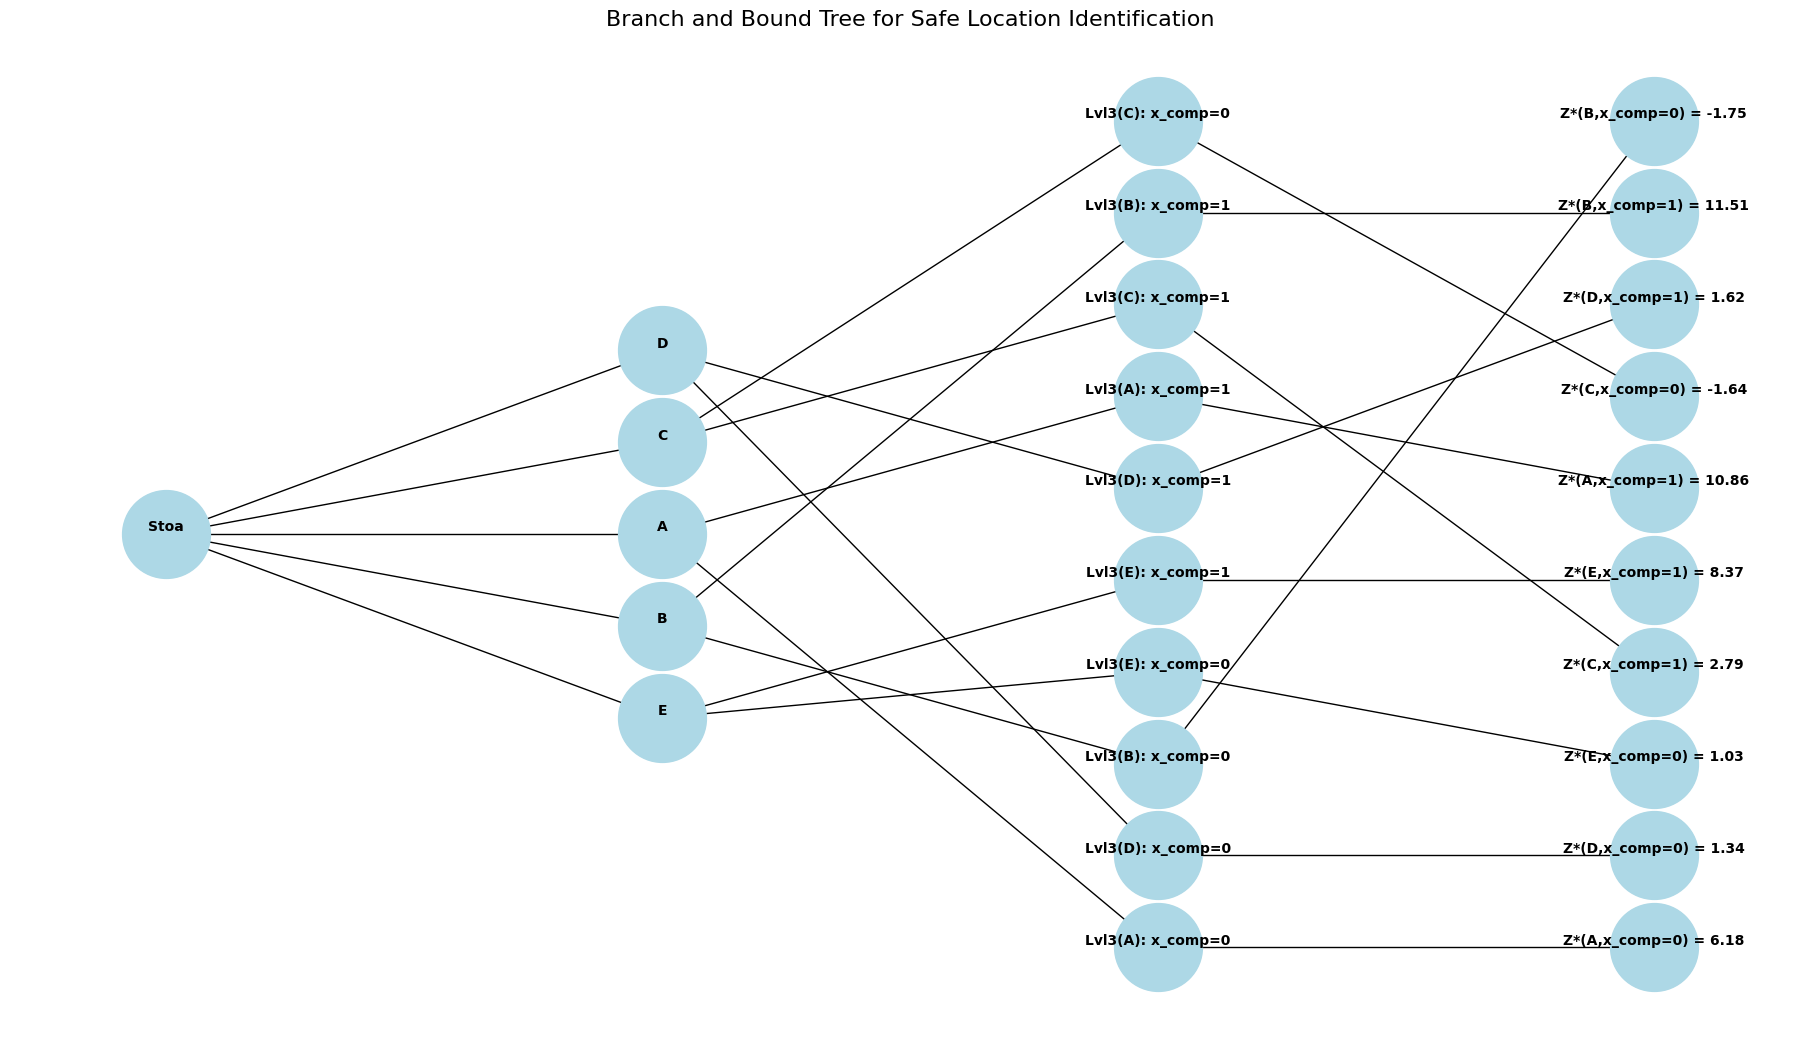

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class LocationAnalysis:
    def __init__(self, restaurant_name, potential_locations, params):
        self.restaurant_name = restaurant_name
        self.potential_locations = potential_locations
        self.params = params # Dictionary of parameters (sl, Ml, wi, fi, Fi, rho)
        self.tree = nx.Graph()
        self.tree.add_node(restaurant_name, level=0)
        self.safe_locations = {}
        self.branching_variable = "x_comp" # A conceptual branching variable

    def _solve_ip_conceptually(self, location_i, branch_level=None, branch_value=None):
        """Conceptual IP solver with simulated outcomes."""
        print(f"Solving IP for {location_i}", end="")
        if branch_level is not None and branch_value is not None:
            print(f" (Level {branch_level}, {self.branching_variable}= {branch_value})")
        else:
            print()
        # Simulate Z* with some dependency on branching for illustration
        if branch_level == 3:
            if branch_value == 0:
                return random.uniform(-2, 8)
            else:
                return random.uniform(1, 12)
        return random.uniform(-5, 10)

    def find_safe_spots_branch_and_bound(self):
        for location in self.potential_locations:
            self.tree.add_node(location, level=1)
            self.tree.add_edge(self.restaurant_name, location)

            # Level 3: Conceptual Branching on a single variable
            for i in range(2): # Branching to 0 and 1
                branch_value = i
                branch_node = f"Lvl3({location}): {self.branching_variable}={branch_value}"
                self.tree.add_node(branch_node, level=3)
                self.tree.add_edge(location, branch_node)

                # Level 5: Conceptual Solution Evaluation (directly after branching)
                z_star = self._solve_ip_conceptually(location, 3, branch_value)
                z_star_node = f"Z*({location},{self.branching_variable}={branch_value}) = {z_star:.2f}"
                self.tree.add_node(z_star_node, level=5)
                self.tree.add_edge(branch_node, z_star_node)

                if z_star > 0:
                    self.safe_locations.setdefault(f"{location} ({self.branching_variable}={branch_value})", z_star)

    def visualize_tree(self):
        pos = nx.multipartite_layout(self.tree, subset_key="level")
        labels = {node: node for node in self.tree.nodes()}
        plt.figure(figsize=(18, 10)) # Increase figure size
        nx.draw(self.tree, pos, with_labels=True, labels=labels, node_size=4000, node_color="lightblue",
                font_size=10, font_weight="bold", verticalalignment='bottom') # Adjust node size and font
        plt.title("Branch and Bound Tree for Safe Location Identification", fontsize=16)
        plt.tight_layout() # Adjust layout to prevent overlap
        plt.show()

# Example Usage
restaurant = "Stoa"
locations = ["A", "B", "C", "D", "E"] # Increased number of locations
parameters = {}

analyzer = LocationAnalysis(restaurant, locations, parameters)
analyzer.find_safe_spots_branch_and_bound()
print("\nPotentially Safe Locations:", analyzer.safe_locations)
analyzer.visualize_tree()